In [1]:
import math
import json
import torch
import utils.harry_plotter as harry_plotter

In [2]:
exponential_runs = list(range(784,796))

In [225]:
x = [sum(2**j for j in range(i)) for i in range(1,12)] + [2207]
accuracy = []
macro_f1 = []
claccuracy_sk = []
claccuracy_mp = []

In [226]:
for run in exponential_runs:
    with open(f"/root/freddie/runs/{run:04d}/metrics.json", "r") as f:
        metrics = json.load(f)
        epoch = int(torch.tensor(metrics["eval/loss"]).argmin())
        accuracy.append(metrics["eval/accuracy"][epoch])
        macro_f1.append(metrics["eval/macro_f1"][epoch])
        claccuracy_sk.append(metrics["eval/claccuracy"][epoch][1])
        claccuracy_mp.append(metrics["eval/claccuracy"][epoch][3])

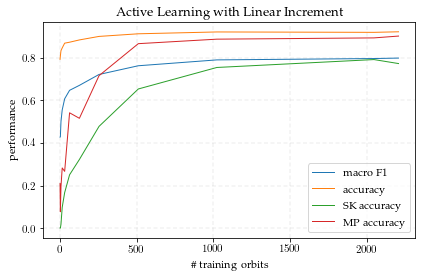

In [227]:
import matplotlib.pyplot as plt
harry_plotter.plot_values(x, macro_f1, label="macro F1")
harry_plotter.plot_values(x, accuracy, label="accuracy")
harry_plotter.plot_values(x, claccuracy_sk, label="SK accuracy")
harry_plotter.plot_values(x, claccuracy_mp, label="MP accuracy")
plt.legend()
harry_plotter.plot_values([], [], title="Active Learning with Linear Increment", xlabel="\# training orbits", ylabel="performance", outfile="/root/freddie/temp/active_exponential.pdf")

In [6]:
exclude = {826, 849, 863, 882, 889, 892, 893, 894, 895, 896, 905}
linear_runs = list(set(range(797,908)) - exclude)

In [7]:
x = list(range(10, 1010, 10))
accuracy = []
macro_f1 = []
claccuracy_sk = []
claccuracy_mp = []

In [8]:
for run in linear_runs:
    with open(f"/root/freddie/runs/{run:04d}/metrics.json", "r") as f:
        metrics = json.load(f)
        epoch = int(torch.tensor(metrics["eval/loss"]).argmin())
        accuracy.append(metrics["eval/accuracy"][epoch])
        macro_f1.append(metrics["eval/macro_f1"][epoch])
        claccuracy_sk.append(metrics["eval/claccuracy"][epoch][1])
        claccuracy_mp.append(metrics["eval/claccuracy"][epoch][3])

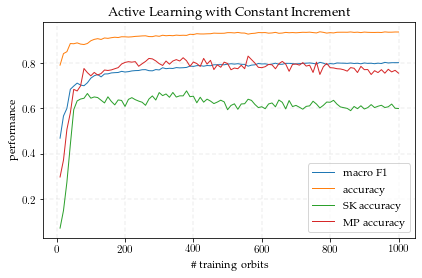

In [216]:
import matplotlib.pyplot as plt
harry_plotter.plot_values(x, macro_f1, label="macro F1")
harry_plotter.plot_values(x, accuracy, label="accuracy")
harry_plotter.plot_values(x, claccuracy_sk, label="SK accuracy")
harry_plotter.plot_values(x, claccuracy_mp, label="MP accuracy")
plt.legend()
harry_plotter.plot_values([], [], title="Active Learning with Constant Increment", xlabel="\# training orbits", ylabel="performance", outfile="/root/freddie/temp/active_linear.pdf")

In [18]:
print(accuracy[43])
print(macro_f1[43])
print(claccuracy_sk[43])
print(claccuracy_mp[43])

0.9289169311523438
0.7891794443130493
0.6410156488418579
0.795386791229248


In [56]:
import pandas as pd
import numpy as np
import yaml
from tqdm import tqdm

time = pd.Timedelta(0)

RUN = linear_runs[22]
with open(f"/root/freddie/runs/{RUN:04d}/hyperparams.yaml", "r") as f:
    hparams = yaml.load(f, Loader=yaml.Loader)
for orbit in tqdm(hparams["train_orbits"]):
    df = pd.read_csv(f"/root/freddie/data/raw/messenger-{run:04d}.csv", usecols=["DATE"], parse_dates=["DATE"])
    time += df["DATE"].iloc[-1] - df["DATE"].iloc[0]
print(f"timedelta after {len(hparams['train_orbits'])} orbits: {time}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:44<00:00,  5.17it/s]

timedelta after 230 orbits: 87 days 00:12:30


In [207]:
import json

with open(f"/root/freddie/temp/al_linear.json", "r") as f: 
    results = json.load(f)

In [208]:
nums = list(range(0, 1010, 10))
uncerts = [max(results[str(n)]["uncertainty"].values()) for n in range(0, 101)]

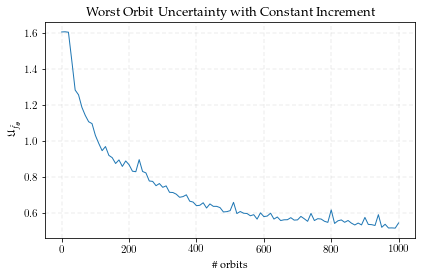

In [223]:
harry_plotter.plot_values(nums, uncerts, 
                          xlabel="\# orbits", 
                          ylabel="$\\mathfrak{U}_{\\hat{f}_{\\bm{\\theta}}}$",
                          title="Worst Orbit Uncertainty with Constant Increment",
                          outfile="/root/freddie/temp/active_linear_uncertainty.pdf")

In [210]:
def entropy(x):
    return -sum(a * math.log(a) for a in x)

In [211]:
def worst_entropy(n):
    worst_preds = list(results[str(n)]["worst_prediction"].values())
    entropies = [entropy(x) for x in worst_preds]
    return max(entropies)

In [212]:
def worst_prediction(n):
    worst_preds = list(results[str(n)]["worst_prediction"].values())
    entropies = [entropy(x) for x in worst_preds]
    return worst_preds[entropies.index(max(entropies))]

In [213]:
worst_prediction(0)

[0.20068618655204773,
 0.20838963985443115,
 0.18658789992332458,
 0.20735344290733337,
 0.19698280096054077]

In [214]:
entrops = [worst_entropy(n // 10) for n in nums]

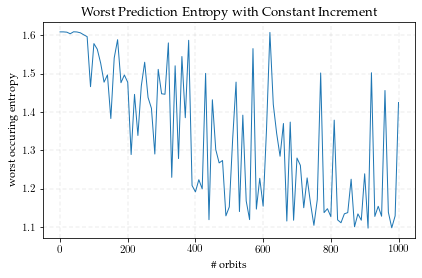

In [222]:
harry_plotter.plot_values(nums, entrops2, 
                          xlabel="\# orbits", 
                          ylabel="worst occuring entropy",
                          title="Worst Prediction Entropy with Constant Increment",
                          outfile="/root/freddie/temp/active_linear_entropy.pdf")